# Imports

In [16]:
!pip3 install snowballstemmer

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
from snowballstemmer.dutch_stemmer import DutchStemmer
from nltk.corpus import stopwords

In [8]:
import re

# Data Reading

In [9]:
data = pd.read_excel('Heijmans data final.xlsx')

In [11]:
data = data[['Categorie ongeval','Beschrijving incident']].dropna()

In [9]:
print(data)

                        Categorie ongeval  \
0                              Aanrijding   
1                              Aanrijding   
2                              Aanrijding   
3                              Aanrijding   
4                              Aanrijding   
...                                   ...   
3302  Vallen (van personen of voorwerpen)   
3303  Vallen (van personen of voorwerpen)   
3304  Vallen (van personen of voorwerpen)   
3305  Vallen (van personen of voorwerpen)   
3306  Vallen (van personen of voorwerpen)   

                                  Beschrijving incident  
0     Materialen in de bus slingeren los. Imperiaal ...  
1     Slachtoffer is aangereden in zijn bedrijfsauto...  
2     Fietspad niet afgeschermd van werkverkeer/terr...  
3     Aanrijding van een verkeersregelaar door een p...  
4     Veegwagen van Wolfswinkel reed (rond 14:50)teg...  
...                                                 ...  
3302  Bij het legen / openen van een big bag is Henk.

In [10]:
data.describe()

,Categorie ongeval,Beschrijving incident
count,3211,3211
unique,10,2831
top,Vallen (van personen of voorwerpen),Er liggen teveel losliggende materialen op de ...
freq,1478,27


In [12]:
data.columns = ['Category', 'Text']

In [14]:
cats = ['Aanrijding',
'Agressie en extreme lichamelijke inspanning',
'Andere vormen van contact met voorwerpen',
'BHV inzet op locatie',
'Gevaarlijke stoffen, brand en explosies',
'Machines en handgereedschap',
'Vallen (van personen of voorwerpen)']


In [15]:
data = data[data['Category'].isin(cats)]

# Data Cleaning

### The following are done to clean the data:
- Lowering all the text
- Removing dutch stopwords
- Stemming

In [18]:
dutch = DutchStemmer()

In [19]:
all_stopwords = stopwords.words('dutch')

In [16]:
print(all_stopwords)

['de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere']


In [20]:
def clean_text(text):
    text = text.lower() # Convert the text to lower case
    text = re.sub(',', ' ', text) # Replace commas with an extra space
    
    text = re.sub('<.*?>', '', text) # Clean out any HTML tags
    text = re.sub('\s+',' ', text) # Replace multiple spaces with 
    
    text = text.split()
    
    text = [re.sub('[^\w]', '', i.rstrip()) for i in text if i not in all_stopwords] # Clean out stopwords
    
    text = dutch.stemWords(text)# Dutch Stemming
    
    text = ' '.join(text)
    return text

In [21]:
data['Text'] = data['Text'].apply(clean_text)

# Resampling to have matching category counts

#### In order for the categories to be evenly distributed they are upsampled to 400 if there are less

In [105]:
sampled_dfs = []
for cat in data['Category'].unique():
    
    temp_df = data[data['Category']==cat]
    s = 400 if temp_df.shape[0] < 400 else temp_df.shape[0] # Upsample t
    temp_df = temp_df.sample(s, replace=True).reset_index(drop=True)
    sampled_dfs.append(temp_df)

sampled_df = pd.concat(sampled_dfs).reset_index(drop=True)

In [37]:
class BrySample:
    import pandas as pd

    @staticmethod
    def upsample(data_df, x, y, charlen = 400):
        x_up, y_up = [], []
        for xcat, ycat in zip(x.unique(), y.unique()):
            xtemp = data_df[x == xcat]
            ytemp = data_df[y == ycat]
            xs = charlen if xtemp.shape[0] < 400 else xtemp.shape[0] # Upsample t
            ys = charlen if ytemp.shape[0] < 400 else ytemp.shape[0] # Upsample t
            xtemp = xtemp.sample(xs, replace=True).reset_index(drop=True)
            ytemp = ytemp.sample(ys, replace=True).reset_index(drop=True)
            x_up.append(xtemp)
            y_up.append(ytemp)

        X_Up = pd.concat(x_up).reset_index(drop=True) #pd.Series(x_up)
        Y_Up = pd.concat(y_up).reset_index(drop=True) #pd.Series(y_up)

        return X_Up,Y_Up

    @staticmethod
    def downsample():
        print("Not Yet")

In [32]:
x_upsample, y_upsameple = BrySample.upsample(data, data["Text"], data["Category"], 400)

In [33]:
print(y_upsameple.size)
print(x_upsample.size)

7936
5600


In [34]:
print(x_upsample)

Category                                               Text
0     Aanrijding  material bus slinger los imperiaal aangevraagd...
1     Aanrijding  material bus slinger los imperiaal aangevraagd...
2     Aanrijding  material bus slinger los imperiaal aangevraagd...
3     Aanrijding  material bus slinger los imperiaal aangevraagd...
4     Aanrijding  material bus slinger los imperiaal aangevraagd...
...          ...                                                ...
2795  Aanrijding  wilco liep heftruck chauffeur vrag terwijl bez...
2796  Aanrijding  wilco liep heftruck chauffeur vrag terwijl bez...
2797  Aanrijding  wilco liep heftruck chauffeur vrag terwijl bez...
2798  Aanrijding  wilco liep heftruck chauffeur vrag terwijl bez...
2799  Aanrijding  wilco liep heftruck chauffeur vrag terwijl bez...

[2800 rows x 2 columns]


In [100]:
print(sampled_df)

                                 Category  \
0                              Aanrijding   
1                              Aanrijding   
2                              Aanrijding   
3                              Aanrijding   
4                              Aanrijding   
...                                   ...   
1473  Vallen (van personen of voorwerpen)   
1474  Vallen (van personen of voorwerpen)   
1475  Vallen (van personen of voorwerpen)   
1476  Vallen (van personen of voorwerpen)   
1477  Vallen (van personen of voorwerpen)   

                                                   Text  
0                      medewerker werk veiligheidsruimt  
1                           ondeug transport mantelbuiz  
2          vast verlicht brandt a73 hrr afzet geplaatst  
3     bus rijstrok 1 120kmu middenberm geleiderail g...  
4     helmpicht word iederen opgevolgd veilgheidsves...  
...                                                 ...  
1473                         vloer steiger overal dic

In [20]:
sampled_dfs = []
for cat in data['Category'].unique():
    
    temp_df = data[data['Category']==cat]
    s = 400 if temp_df.shape[0] < 400 else temp_df.shape[0] # Upsample t
    temp_df = temp_df.sample(s, replace=True).reset_index(drop=True)
    sampled_dfs.append(temp_df)

sampled_df1 = pd.concat(sampled_dfs)

In [21]:
print (sampled_df1)

                                 Category  \
0                              Aanrijding   
1                              Aanrijding   
2                              Aanrijding   
3                              Aanrijding   
4                              Aanrijding   
...                                   ...   
1473  Vallen (van personen of voorwerpen)   
1474  Vallen (van personen of voorwerpen)   
1475  Vallen (van personen of voorwerpen)   
1476  Vallen (van personen of voorwerpen)   
1477  Vallen (van personen of voorwerpen)   

                                                   Text  
0     heijman werkjass waterafstot hierdor vak refle...  
1        cluster 3 shovelmachinist rijd bellend terrein  
2     n506 florasingel barrier lang rijban stat op s...  
3     incident eerst instantie genoteerd schademeld ...  
4     ter plat slop boerderij sleuf gegrav vlak naas...  
...                                                 ...  
1473  aanrijd werkplek afzethek verplaatst busj kunn.

In [19]:
x = sampled_df['Text']
y = sampled_df['Category']

In [98]:
print(x)

0       vind dagelijk control omleid plat weggebruiker...
1       auto tunnelbuis gered terwijl afgeslot was fou...
2                   bus kentekenheeft overgewicht inschat
3       betreft situatie war getwijfeld juist maatrege...
4       medewerker draagt refecter hesjejas waardor aa...
                              ...                        
3963    medewerker stat werk werkbank bedrijfsbus stat...
3964    uitgegled bouwbord los grond lag loss vrachtwa...
3965                              schaftket schon project
3966    steigerdel hand afstap gemaakt piepschuim trap...
3967    vlechtwerk uitkijkpunt onderdoorgang uitvoer l...
Name: Text, Length: 3968, dtype: object


In [23]:
sampled_dfs = []
for cat in data['Category'].unique():
    
    temp_df = data[data['Category']==cat]
    s = 400 if temp_df.shape[0] < 400 else temp_df.shape[0] # Upsample t
    temp_df = temp_df.sample(s, replace=True).reset_index(drop=True)
    sampled_dfs.append(temp_df)

sampled_df = pd.concat(sampled_dfs).reset_index(drop=True)

In [24]:
x = sampled_df['Text']
y = sampled_df['Category']

# Train, Test Split

### Validation is done by cross validation, so only test set is split initially

In [35]:
X, test_x, y, test_y = train_test_split(x, y, test_size=0.15, random_state=0, shuffle=True)

NameError: name 'x' is not defined

# Data Transformation

In [36]:
tf = TfidfVectorizer()
tf.fit(X)


NameError: name 'X' is not defined

In [27]:
len(tf.get_feature_names())


6058

In [21]:
print(tf.get_feature_names())

['0007', '010914', '02', '0204', '020517', '0230', '0400', '04000617', '050914', '06102017', '0624', '070', '070115', '0730', '080', '080517', '08092017', '0ngever', '10', '100', '1000', '1000bar', '1000kg', '1000x38x89', '10012015', '10102014', '101117', '10122015', '1020', '10517', '10cm', '10de', '10kv', '10x', '11', '1100', '1100u', '112', '112016', '1130', '12', '120', '12012018', '120kmu', '1220', '125', '126565', '13', '1300ur', '130614', '132', '13431', '14', '140', '1400ur', '140819', '14102018', '14112017', '1430', '1450teg', '14793', '15', '150', '1500', '150kv', '152015', '1530', '15341', '15b', '16', '160', '160mm', '1615', '16288', '16299', '1630', '17', '170m', '17112014', '1732017', '1735', '1745010006', '178m', '18', '180', '180818', '180ton', '181114', '19', '19102016', '19185', '19418', '19907', '1cm', '1e', '1m', '1m80', '1mtr', '1mtr50', '1ste', '20', '2000', '2000kg', '2000mm', '20011', '20022018', '2005', '2006', '200mm', '2010', '2014', '2015', '2016', '2017', '

In [28]:
X = tf.transform(X)
test_X = tf.transform(test_x)

In [106]:
print(X)

  (0, 5665)	0.16976790830559543
  (0, 5127)	0.3320734477783637
  (0, 4893)	0.19639007310513165
  (0, 3724)	0.2798660301777305
  (0, 3661)	0.2823148548293581
  (0, 3273)	0.34033119641627285
  (0, 3226)	0.1509860493441311
  (0, 2896)	0.17982218458788565
  (0, 2814)	0.34033119641627285
  (0, 2088)	0.2775428428415158
  (0, 1688)	0.34033119641627285
  (0, 1286)	0.31370903161673663
  (0, 924)	0.29369744399937553
  (1, 5050)	0.4143395950725479
  (1, 4957)	0.3882481314979803
  (1, 4786)	0.35669814355032786
  (1, 3226)	0.19243651495984676
  (1, 3084)	0.2650193912540249
  (1, 2847)	0.28481634918930765
  (1, 2232)	0.4866570622700868
  (1, 2088)	0.35373716750968026
  (2, 5046)	0.4543815543430806
  (2, 4937)	0.18232039564438385
  (2, 4869)	0.4629950126119811
  (2, 3574)	0.4990930951771326
  :	:
  (3370, 2992)	0.1091251537410198
  (3370, 2930)	0.17694347062458382
  (3370, 2924)	0.10813028513182331
  (3370, 2739)	0.14461194032848224
  (3370, 2595)	0.1254503682196747
  (3370, 2536)	0.1706003167624411


# Gridsearch to find best models

### Logistic Regression

In [29]:
lr_gc = GridSearchCV(LogisticRegression(random_state=0), {'penalty':['l1', 'l2'], 'C':[0.1, 1, 5, 10]}, scoring='f1_macro')

In [30]:
lr_gc.fit(X, y)

C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 pena

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [31]:
lr_gc.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr_best_score = lr_gc.best_score_
lr_best_score

0.8886864543788855

In [33]:
print("lr_P score (test):",lr_gc.score(test_X , test_y))


lr_P score (test): 0.9141986954085171


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
lr_gc_predict= lr_gc.predict(test_X)
print(classification_report(test_y, lr_gc_predict))

                                             precision    recall  f1-score   support

                                 Aanrijding       0.98      0.86      0.92        51
Agressie en extreme lichamelijke inspanning       1.00      0.96      0.98        77
   Andere vormen van contact met voorwerpen       0.76      0.75      0.76        64
                       BHV inzet op locatie       0.96      0.97      0.96        66
    Gevaarlijke stoffen, brand en explosies       0.97      0.98      0.98        61
                Machines en handgereedschap       0.85      0.89      0.87        62
        Vallen (van personen of voorwerpen)       0.93      0.95      0.94       215

                                   accuracy                           0.92       596
                                  macro avg       0.92      0.91      0.91       596
                               weighted avg       0.92      0.92      0.92       596



In [42]:
print(confusion_matrix( test_y,lr_gc_predict))

[[ 25   0   1   2   0   0   5]
 [  0  49   0   0   0   0   0]
 [  0   4  29   2   0   5   5]
 [  0   0   0  46   0   0   0]
 [  0   0   2   0  39   0   0]
 [  1   0   3   0   0  34   5]
 [  0   1   1   1   0   2 135]]


In [35]:
pd.DataFrame(confusion_matrix( test_y,lr_gc_predict, labels=y.unique()), columns =test_y.unique(), index=y.unique())

,Vallen (van personen of voorwerpen),"Gevaarlijke stoffen, brand en explosies",Andere vormen van contact met voorwerpen,BHV inzet op locatie,Aanrijding,Agressie en extreme lichamelijke inspanning,Machines en handgereedschap
"Gevaarlijke stoffen, brand en explosies",60,0,0,0,0,0,1
Andere vormen van contact met voorwerpen,1,48,8,5,0,0,2
Machines en handgereedschap,0,4,55,3,0,0,0
Vallen (van personen of voorwerpen),0,7,2,205,1,0,0
Aanrijding,0,2,0,5,44,0,0
Agressie en extreme lichamelijke inspanning,0,1,0,2,0,74,0
BHV inzet op locatie,1,1,0,0,0,0,64


### Random Forest

In [318]:
rf_gc = GridSearchCV(RandomForestClassifier(random_state=0), {'n_estimators':[10, 25, 100, 250], 'max_depth':[None, 1, 5, 10, 25]}, verbose=3)
rf_gc.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=None, n_estimators=10 .................................
[CV] ..... max_depth=None, n_estimators=10, score=0.906, total=   0.3s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... max_depth=None, n_estimators=10, score=0.899, total=   0.3s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..... max_depth=None, n_estimators=10, score=0.870, total=   0.3s
[CV] max_depth=None, n_estimators=10 .................................
[CV] ..... max_depth=None, n_estimators=10, score=0.878, total=   0.3s
[CV] max_depth=None, n_estimators=10 .................................
[CV] ..... max_depth=None, n_estimators=10, score=0.874, total=   0.3s
[CV] max_depth=None, n_estimators=25 .................................
[CV] ..... max_depth=None, n_estimators=25, score=0.908, total=   0.7s
[CV] max_depth=None, n_estimators=25 .................................
[CV] ..... max_depth=None, n_estimators=25, score=0.906, total=   0.6s
[CV] max_depth=None, n_estimators=25 .................................
[CV] ..... max_depth=None, n_estimators=25, score=0.882, total=   0.7s
[CV] max_depth=None, n_estimators=25 .................................
[CV] ..... max_depth=None, n_estimators=25, score=0.894, total=   0.7s
[CV] max_depth=None, n_estimators=25 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [319]:
rf_gc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [320]:
rf_gc.best_score_

0.8963855752091046

In [ ]:
print("SVM_P score (test):",SVM_cl_p.score(tfidf_text_v_test, label_1_test))
print("SVM_P  score (training):", SVM_cl_p.score(tfidf_text_v_train, label_1_train))

## KNeighborsClassifier

In [87]:
knn_gc = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1,20)}, n_jobs=-1, return_train_score=True)
knn_gc.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

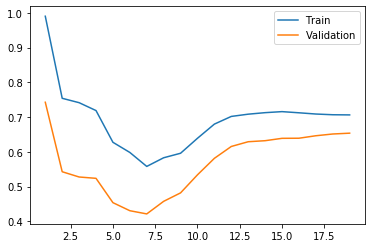

In [88]:
train_accuracy = knn_gc.cv_results_['mean_train_score']
test_accuracy = knn_gc.cv_results_['mean_test_score']

plt.plot(range(1, 20), train_accuracy, label="Train")
plt.plot(range(1, 20), test_accuracy, label="Validation")
plt.legend()
plt.show()

In [94]:
print (train_accuracy )
print (train_accuracy.mean() )
print(test_accuracy.mean())

[0.98999091 0.7539344  0.74132788 0.71864422 0.62737641 0.59816907
 0.55799198 0.58289869 0.59586815 0.63893468 0.67971271 0.70180768
 0.70825806 0.71263307 0.71559826 0.71226281 0.70870399 0.70662818
 0.70618313]
0.6924696984774661
0.5685285716764711


In [82]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)

knn_gc = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1,20)}, n_jobs=-1, return_train_score=True, cv=cv)
knn_gc.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=4, random_state=1),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

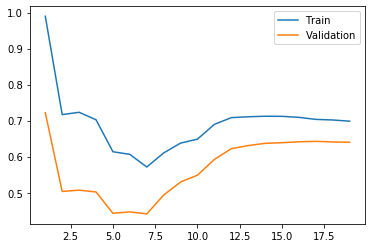

In [83]:
train_accuracy = knn_gc.cv_results_['mean_train_score']
test_accuracy = knn_gc.cv_results_['mean_test_score']

plt.plot(range(1, 20), train_accuracy, label="Train")
plt.plot(range(1, 20), test_accuracy, label="Validation")
plt.legend()
plt.show()

In [85]:
print (train_accuracy )
print (train_accuracy.mean() )
print(test_accuracy)

[0.98996639 0.71678529 0.72321076 0.70250099 0.6136813  0.60636615
 0.57127323 0.61027086 0.63765322 0.64862594 0.68969949 0.70833333
 0.71085409 0.71223804 0.71199091 0.70912416 0.70353895 0.70185844
 0.69854686]
[0.72197509 0.50341044 0.50696916 0.50192764 0.44276394 0.44661922
 0.44098458 0.4933274  0.52965599 0.54863582 0.59237841 0.62218268
 0.63078292 0.63701068 0.63879004 0.64131079 0.64249703 0.64086595
 0.63997628]


# Best model and test set

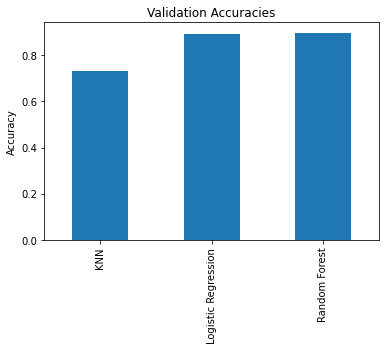

In [324]:
score_dict = pd.Series({"Logistic Regression":lr_gc.best_score_, "Random Forest":rf_gc.best_score_, "KNN":knn_gc.best_score_})
score_dict.sort_values().plot(kind='bar', title="Validation Accuracies")
plt.ylabel("Accuracy")
plt.show()

In [325]:
lr_gc.score(test_X, test_y)

0.9277225512837743

In [326]:
lr_gc.score(test_X, test_y)

0.9277225512837743

In [93]:
print("lr_P score (test):",lr_gc.score(test_X , test_y))
print("lr_P  score (training):", test_accuracy.mean() )

lr_P score (test): 0.9033330952492843
lr_P  score (training): 0.5685285716764711


In [95]:
print (train_accuracy.mean() )

0.6924696984774661


# Model without up/down sampling 

In [85]:
x = data['Text']
y = data['Category']

In [86]:
X, test_x, y, test_y = train_test_split(x, y, test_size=0.15, random_state=0, shuffle=True)
tf = TfidfVectorizer()
tf.fit(X)
len(tf.get_feature_names())


7053

In [87]:
X = tf.transform(X)
test_X = tf.transform(test_x)


In [39]:
lr_gc = GridSearchCV(LogisticRegression(random_state=0), {'penalty':['l1', 'l2'], 'C':[0.1, 1, 5, 10]}, scoring='f1_macro')
lr_gc.fit(X, y)
lr_gc.best_estimator_

C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 pena

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr_best_score = lr_gc.best_score_
lr_best_score

0.4958619212490052

In [41]:
knn_gc = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':range(1,20)}, n_jobs=-1, return_train_score=True)
knn_gc.fit(X, y)
train_accuracy = knn_gc.cv_results_['mean_train_score']
test_accuracy = knn_gc.cv_results_['mean_test_score']

In [44]:
knn_best_score = knn_gc.best_score_
knn_best_score

0.6756852044352044

In [45]:
print(train_accuracy.mean() )
print(test_accuracy.mean())

0.7215037835911801
0.6067576230076229


In [48]:
preds = knn_gc.predict(test_x)

ValueError: could not convert string to float: 'verstapt enkel verzwikt'

In [41]:

from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
print("Recall:" + recall_score(preds, test_y, average='macro').astype(str))
print("Precision:" + precision_score(preds, test_y, average='macro').astype(str))
print("F1:" + f1_score(preds, test_y, average='macro').astype(str))

NameError: name 'preds' is not defined

In [99]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

In [ ]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
#using gridsearch
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train);

In [ ]:
grid_imba.best_params_

In [ ]:
grid_imba.best_score_

In [ ]:
y_test_predict = grid_imba.predict(X_test)
recall_score(y_test, y_test_predict)

In [89]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
kf = KFold(n_splits=5, random_state=42, shuffle=False)

C:\Users\byri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [97]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(imba_pipeline, X, y,  cv=kf).mean()

0.7015064102564101

In [94]:
#using gridsearch
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                        return_train_score=True)
grid_imba.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=42,
                                              sampling_strategy='auto')),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',...
                                              

In [95]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__random_state': 13}

In [96]:
grid_imba.best_score_

0.6028326403326403

In [102]:
y_test_predict = grid_imba.predict(X)
recall_score(y, y_test_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
example_params = {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 13
    }

def score_model(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTE(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # # Upsample only the data in the training section
        # X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                    y_train_fold)

        # Upsample only the data in the training section (Using Bry upsample code)
        X_train_fold_upsample, y_train_fold_upsample = BrySample.upsample(data,x_train_fold,y_train_fold, 400)
        
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

# Example of the model in action
score_model(RandomForestClassifier, example_params, cv=kf)
array([0.78378378, 0.76315789, 0.96875   , 0.81481481, 0.90243902])
We can even do grid search this way by looping over the parameters. As a reminder, the parameter combinations we tried earlier were

params
{'n_estimators': [50, 100, 200],
 'max_depth': [4, 6, 10, 12],
 'random_state': [13]}
This loop tries all combinations, and stores the average recall score on the validation sets:

score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        example_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'random_state': 13
        }
        example_params['recall'] = score_model(RandomForestClassifier, 
                                               example_params, cv=kf).mean()
        score_tracker.append(example_params)
        
# What's the best model?
sorted(score_tracker, key=lambda x: x['recall'], reverse=True)[0]

In [111]:
example_params = {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 13
    }

def score_model(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = sampled_df
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X, y):
        # Get the training data
        X_train_fold, y_train_fold = X[train_fold_index], y[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X[val_fold_index], y[val_fold_index]

        # # Upsample only the data in the training section
        # X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
        #                                                                    y_train_fold)

        # Upsample only the data in the training section (Using Bry upsample code)
        X_train_fold_upsample, y_train_fold_upsample = BrySample.upsample(data,x_train_fold,y_train_fold, 400)
        
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
        scores.append(score)
    return np.array(scores)

# Example of the model in action
score_model(RandomForestClassifier, example_params, cv=kf)
# array([0.78378378, 0.76315789, 0.96875   , 0.81481481, 0.90243902])
# We can even do grid search this way by looping over the parameters. As a reminder, the parameter combinations we tried earlier were



KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [110]:
params
{'n_estimators': [50, 100, 200],
 'max_depth': [4, 6, 10, 12],
 'random_state': [13]}
This loop tries all combinations, and stores the average recall score on the validation sets:

score_tracker = []
for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
        example_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'random_state': 13
        }
        example_params['recall'] = score_model(RandomForestClassifier, 
                                               example_params, cv=kf).mean()
        score_tracker.append(example_params)
        
# What's the best model?
sorted(score_tracker, key=lambda x: x['recall'], reverse=True)[0]

SyntaxError: invalid syntax (<ipython-input-110-c727afa9a18c>, line 5)